# K Means Clustering

Here we shall be looking at sepal data from sklearn. We shall be evaluating the petal lengths and widths in order to classify the flowers into different clusters of species. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy

In [ ]:
iris = datasets.load_iris()
samples = iris.data

In [9]:
samples[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [2]:
# Below returns the 0th column (iris length) and 1st column (iris width).
x = samples[:,0]
y = samples[:,1]
# Join them together into a single array with one column for each
sepal_length_width = np.array(list(zip(x, y)))

In [4]:
# Step 1: Place K random centroids
k = 3
# The centroids for x are random x coordinates randomly placed between
# the largest and smallest x values that exist for the iris length
centroids_x = np.random.uniform(min(x), max(x), size=k)
# The same can be said for y only with the iris width now instead
centroids_y = np.random.uniform(min(y), max(y), size=k)

# Join the centroids together
centroids = np.array(list(zip(centroids_x, centroids_y)))

In [5]:
# The distance function is used to calculate the distance between the centroid
# and the value of an iris (or an older centroid). 
# One compares the x coordinates while two compares the y coordinates.
def distance(a, b):
  one = (a[0] - b[0]) ** 2
  two = (a[1] - b[1]) ** 2
  distance = (one + two) ** 0.5
  return distance

Next we create 4 'blank' variables that are full of zeros in order to be used
later. The first is centroids_old that is where we shall store the value
of the centroid when it updates (this can later be used to calculate how far
we've moved). The next are the cluster labels. The cluster labels are simply
which centroid each sepal coordinate is closest to. The distances are the 
distances between the centroid and their respective sepals in their 
jurisdiction. The error is the distance between the centroids and their older
counterparts. 

In [10]:
# To store the value of centroids when it updates
centroids_old = np.zeros(centroids.shape)

# Cluster labeles (either 0, 1, or 2)
labels = np.zeros(len(samples))

# To store the distance between the centroids and the sepal_length_width
distances = np.zeros(3)

# Initialize error:
error = np.zeros(3)

error[0] = distance(centroids[0], centroids_old[0])
error[1] = distance(centroids[1], centroids_old[1])
error[2] = distance(centroids[2], centroids_old[2])


In [11]:
# Repeat Steps 2 and 3 until convergence:

while error.all() != 0:

  # Step 2: Assign samples to nearest centroid
  # Compare the coordinates of the ith sepal with every centroid and store
  # their distances in distances. The 0th-centroid's distance shall be
  # the 0th element of distances, so that way they match. 
  for i in range(len(samples)):
    distances[0] = distance(sepal_length_width[i], centroids[0])
    distances[1] = distance(sepal_length_width[i], centroids[1])
    distances[2] = distance(sepal_length_width[i], centroids[2])
    cluster = np.argmin(distances)
    labels[i] = cluster

  # Step 3: Update centroids
  # store the old centroid locations
  centroids_old = deepcopy(centroids)
  
  # We look at one centroid at a time. points shall be stored with all the 
  # points for the ith centroid that we are considering at that time. 
  for i in range(3):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    # The centroid is moved to the mean of its current jurisdiction
    centroids[i] = np.mean(points, axis=0)

  # The error is calculated for every centroid 
  # relative to its previous location
  error[0] = distance(centroids[0], centroids_old[0])
  error[1] = distance(centroids[1], centroids_old[1])
  error[2] = distance(centroids[2], centroids_old[2])
  
  # Note, once the centroid no longer moves, that means that the error will be
  # 0 and the while loop shall finish.

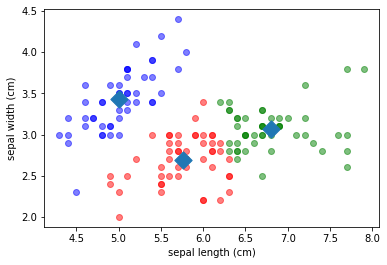

In [12]:
# Lastly we plot the results

colors = ['r', 'g', 'b']

for i in range(k):
  points = np.array([sepal_length_width[j] for j in range(len(samples)) if labels[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

# centroids[:, 0] are all the x values for all the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()